In [ ]:
# Maternal Health Risk Predictor

**Author**: Meron Assefa  
**Project Goal**: Predict the maternal health risk level (Low, Mid, High) based on patient health metrics.  
**Dataset**: Maternal Health Risk Data Set (Kaggle)  
**Target Variable**: `RiskLevel`  
**Features Used**:
- Age
- SystolicBP
- DiastolicBP
- Blood Sugar (BS)
- Body Temperature
- Heart Rate

**Machine Learning Algorithms Used**:
- Logistic Regression
- Naive Bayes (GaussianNB)

This notebook performs data exploration, visualization, preprocessing, model training, evaluation, and comparison between algorithms to determine the best performing model.


In [3]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# Warnings and Settings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Scikit-learn Libraries
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing


In [5]:
# Load the dataset
df = pd.read_csv("Maternal Health Risk Data Set.csv")

# Preview the data
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.000,98.000,86,high risk
1,35,140,90,13.000,98.000,70,high risk
2,29,90,70,8.000,100.000,80,high risk
3,30,140,85,7.000,98.000,70,high risk
4,35,120,60,6.100,98.000,76,low risk


In [6]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

# View general info about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check unique values in the target column
print("\nRisk Level Distribution:")
print(df["RiskLevel"].value_counts())




Shape of dataset: (1014, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None

Missing Values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Descriptive Statistics:
           Age  SystolicBP  DiastolicBP       BS  BodyTemp  HeartRate
count 1014.000    1014.000     1014.000 1014.000  1014.000   1014.000
mean    29.872     113.198       76.461    8.726    98.665     74.302
std     13.474      1

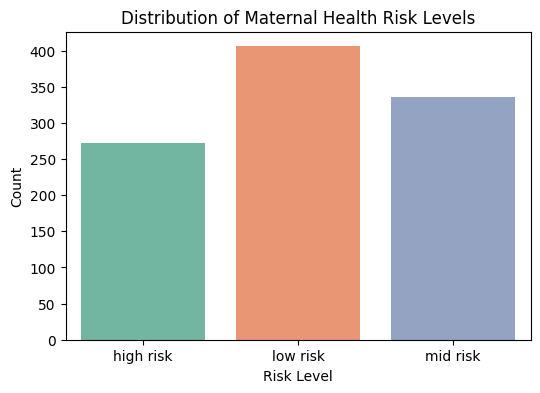

In [7]:
# Plot the distribution of Risk Levels( just adding )
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="RiskLevel", palette="Set2")
plt.title("Distribution of Maternal Health Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()


In [8]:
# Strip whitespace from target labels (just in case)
df["RiskLevel"] = df["RiskLevel"].str.strip().str.lower()

# Encode the RiskLevel column using LabelEncoder
le = LabelEncoder()
df["RiskLevel_encoded"] = le.fit_transform(df["RiskLevel"])

# Preview the encoded values
print("Encoded Risk Levels:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Show first few rows to verify
df[["RiskLevel", "RiskLevel_encoded"]].head()


Encoded Risk Levels:
{'high risk': 0, 'low risk': 1, 'mid risk': 2}


,RiskLevel,RiskLevel_encoded
0,high risk,0
1,high risk,0
2,high risk,0
3,high risk,0
4,low risk,1


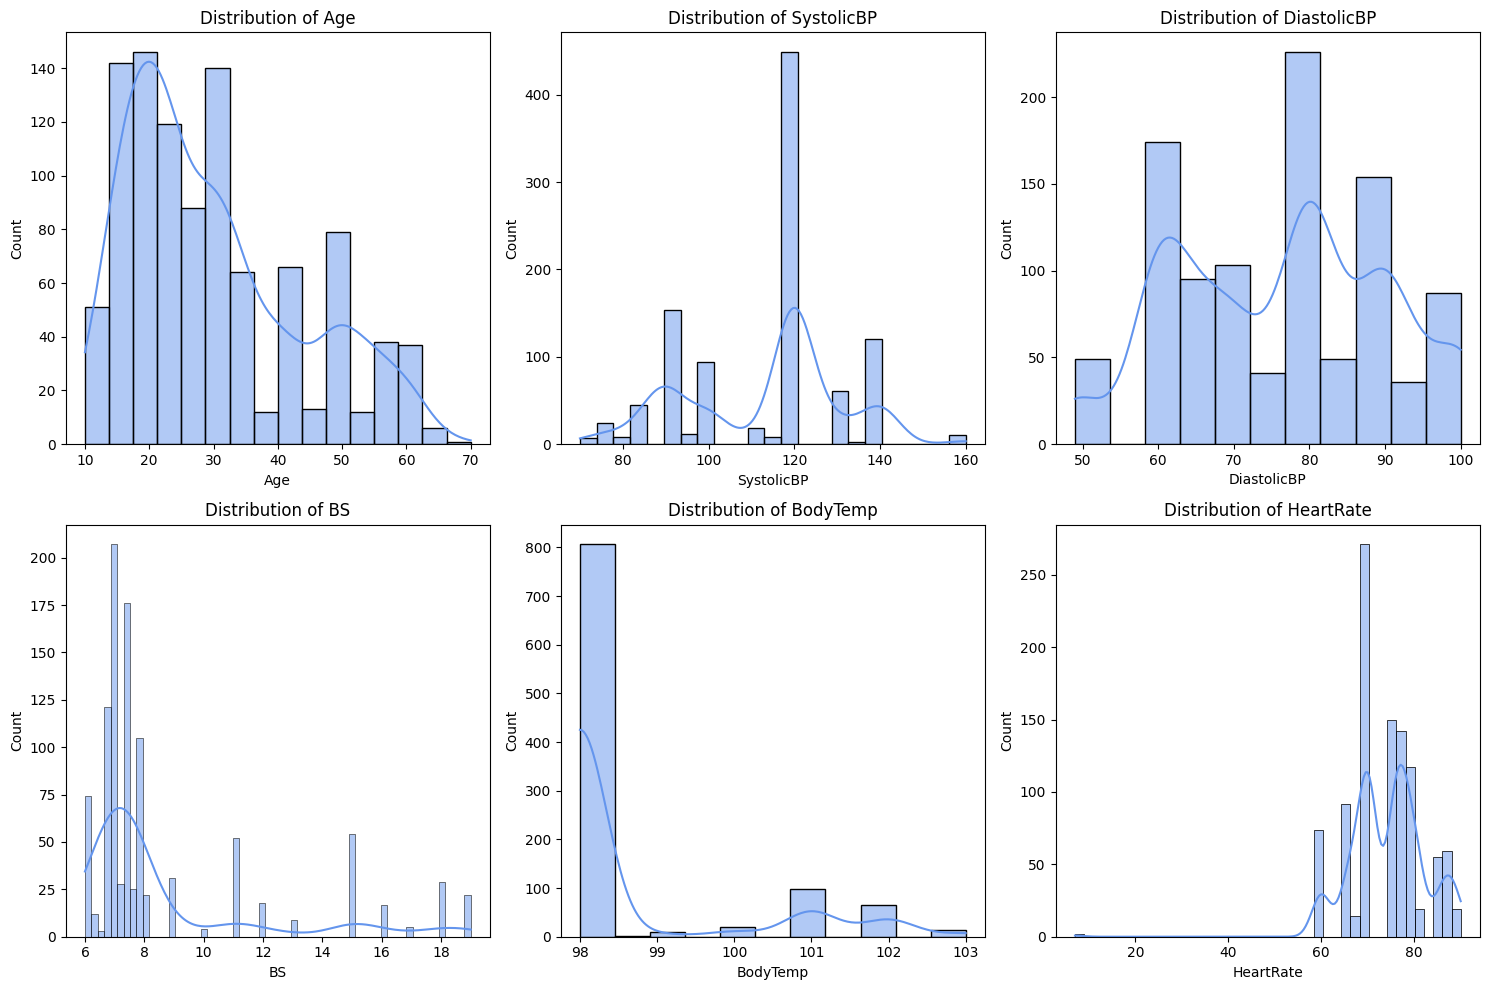

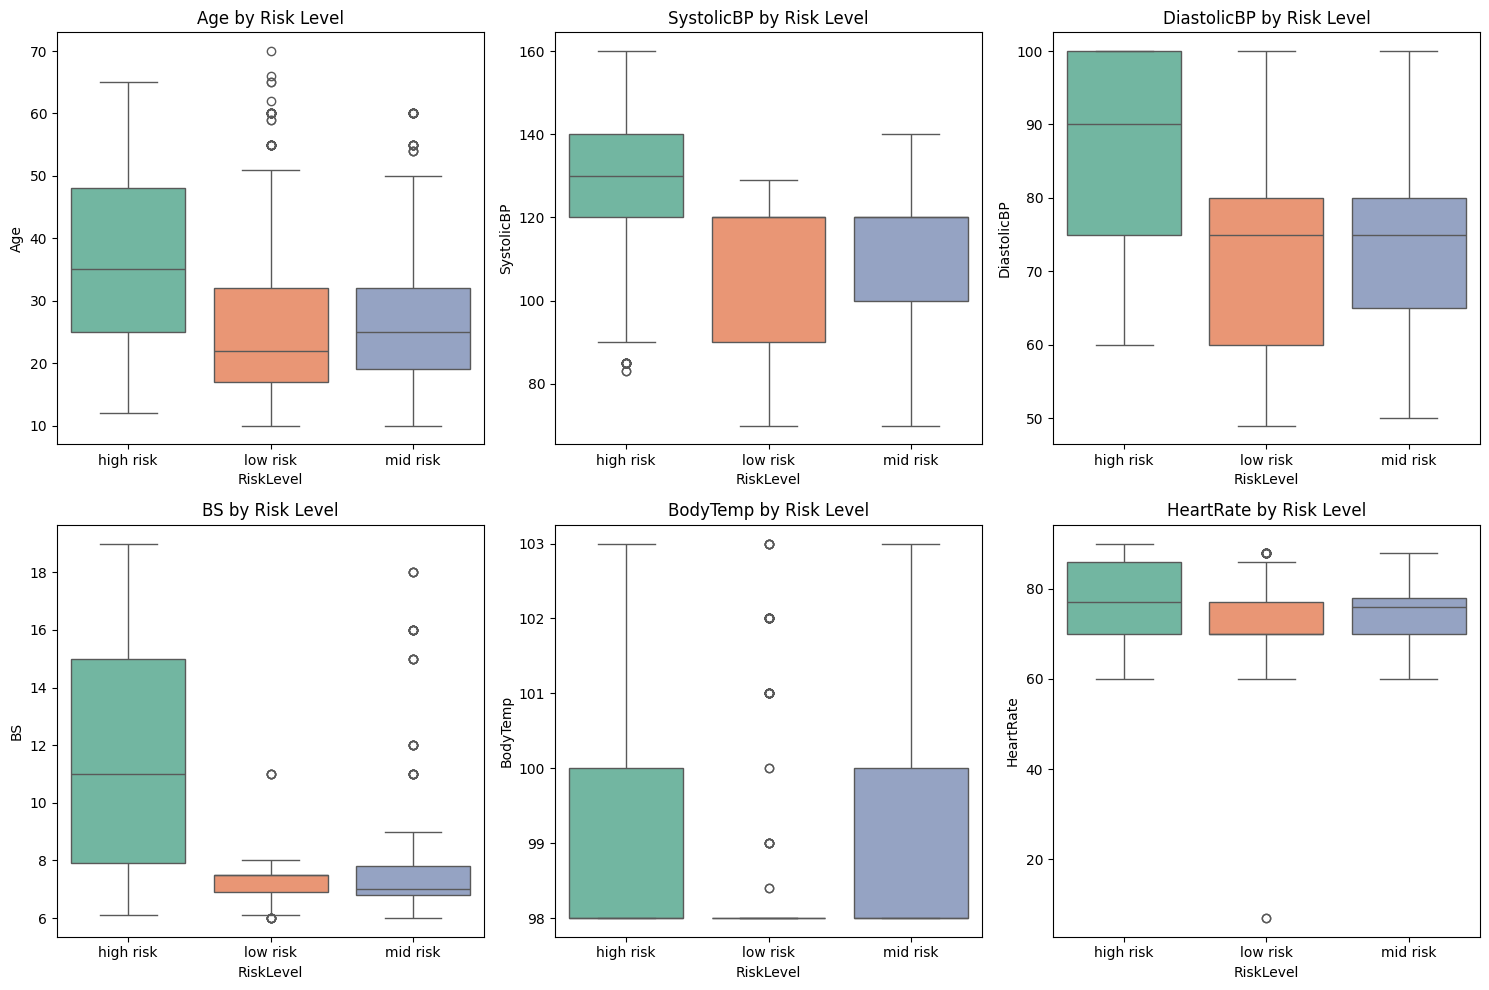

In [16]:
# ================================
# More Data Exploration Charts
# ================================

# 1. Distribution of each numeric feature
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Boxplots by Risk Level
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='RiskLevel', y=col, palette='Set2')
    plt.title(f'{col} by Risk Level')
plt.tight_layout()
plt.show()


In [9]:
# Define feature columns (X) and target (y)
X = df.drop(["RiskLevel", "RiskLevel_encoded"], axis=1)
y = df["RiskLevel_encoded"]

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (811, 6)
Test Set Shape: (203, 6)


In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test features (don't fit again!)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Initialize and train the model
log_model = LogisticRegression(multi_class='ovr', max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_model.predict(X_test_scaled)


Accuracy Score: 0.6600985221674877

Classification Report:
              precision    recall  f1-score   support

   high risk       0.83      0.80      0.81        55
    low risk       0.60      0.85      0.70        81
    mid risk       0.60      0.31      0.41        67

    accuracy                           0.66       203
   macro avg       0.68      0.66      0.64       203
weighted avg       0.66      0.66      0.64       203



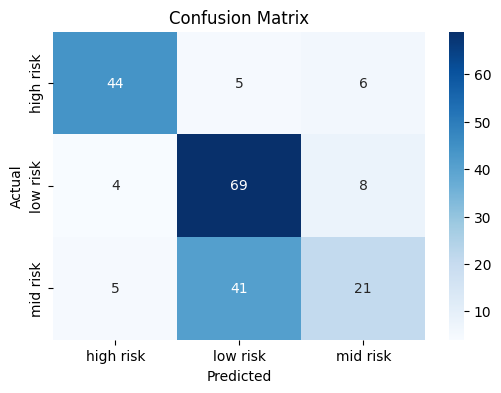

In [12]:
# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()





<Figure size 800x500 with 0 Axes>

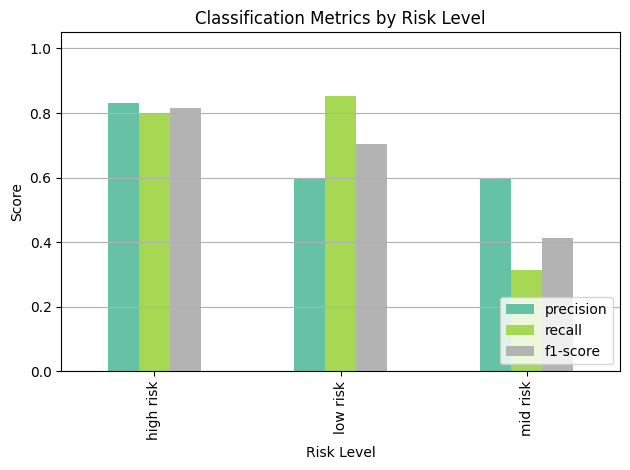

In [13]:
# This bar chart visualizes the model's precision, recall, and F1-score for each risk level.
# Get classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:-3]  # exclude avg/total rows

# Plot Precision, Recall, F1-score
plt.figure(figsize=(8, 5))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='Set2')
plt.title("Classification Metrics by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Naive Bayes Accuracy: 0.6157635467980296

Naive Bayes Classification Report:
              precision    recall  f1-score   support

   high risk       0.93      0.71      0.80        55
    low risk       0.57      0.93      0.71        81
    mid risk       0.37      0.16      0.23        67

    accuracy                           0.62       203
   macro avg       0.62      0.60      0.58       203
weighted avg       0.60      0.62      0.58       203



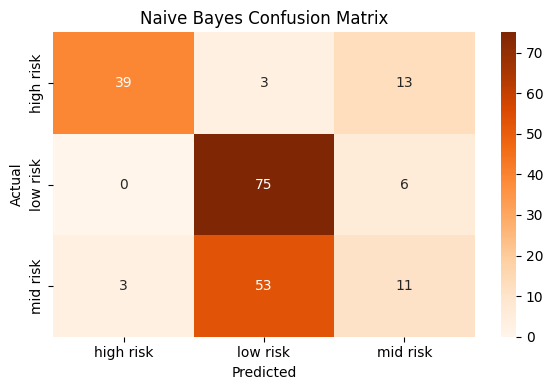


 Model Comparison:

                 Model  Accuracy  F1 Score (macro avg)
0  Logistic Regression     0.660                 0.644
1          Naive Bayes     0.616                 0.579


In [14]:
# ==========================
# Train Naive Bayes Model
# ==========================
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate Naive Bayes
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.tight_layout()
plt.savefig("naive_bayes_confusion_matrix.png")
plt.show()

# ==========================
# Model Comparison Summary
# ==========================
results = {
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_nb)
    ],
    "F1 Score (macro avg)": [
        classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['f1-score']
    ]
}

results_df = pd.DataFrame(results)
print("\n Model Comparison:\n")
print(results_df)


<Figure size 800x500 with 0 Axes>

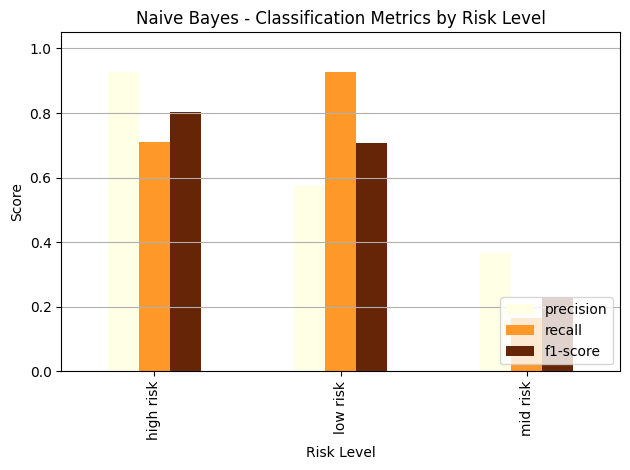

In [15]:
# Bar Chart of Classification Metrics for Naive Bayes
nb_report = classification_report(y_test, y_pred_nb, target_names=le.classes_, output_dict=True)
nb_report_df = pd.DataFrame(nb_report).transpose().iloc[:-3]

plt.figure(figsize=(8, 5))
nb_report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='YlOrBr')
plt.title("Naive Bayes - Classification Metrics by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("naive_bayes_classification_metrics.png")
plt.show()
